In [4]:
import numpy as np
from scipy.signal import stft
from matplotlib import pyplot as plt

from joint import Joint
import bvh

In [14]:
data_path = '../data/1111/straight_1_Take_001.bvh'
# data_path = '../data/1111/slice_data/slice_1_Take_001.bvh'
data, fs, text = bvh.bvhreader(data_path)

In [15]:
window_num = 120
stride_num = 10

freq, t, F = stft(data[:, 33], fs=120, nperseg=window_num, noverlap=(window_num-stride_num))
F_power = np.abs(F)
freqall = freq

F_powerall = np.power(F_power,2)

In [16]:
for i in range(2):
    freq, t, F = stft(data[:,i+34], fs=120, nperseg=window_num, noverlap=(window_num-stride_num))
    F_power = np.abs(F)
    freqall = freqall + freq

    F_powerall = F_powerall + np.power(F_power, 2)


In [17]:
freq = freqall / 3
F_power = np.sqrt(F_powerall)

F_power = (F_power - np.min(F_power)) / np.max(F_power) - np.min(F_power)

/var/folders/p3/957cf5zx3wd1x99hysz07zmh0000gn/T/ipykernel_41795/1329311204.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, freq, F_power, cmap='jet')


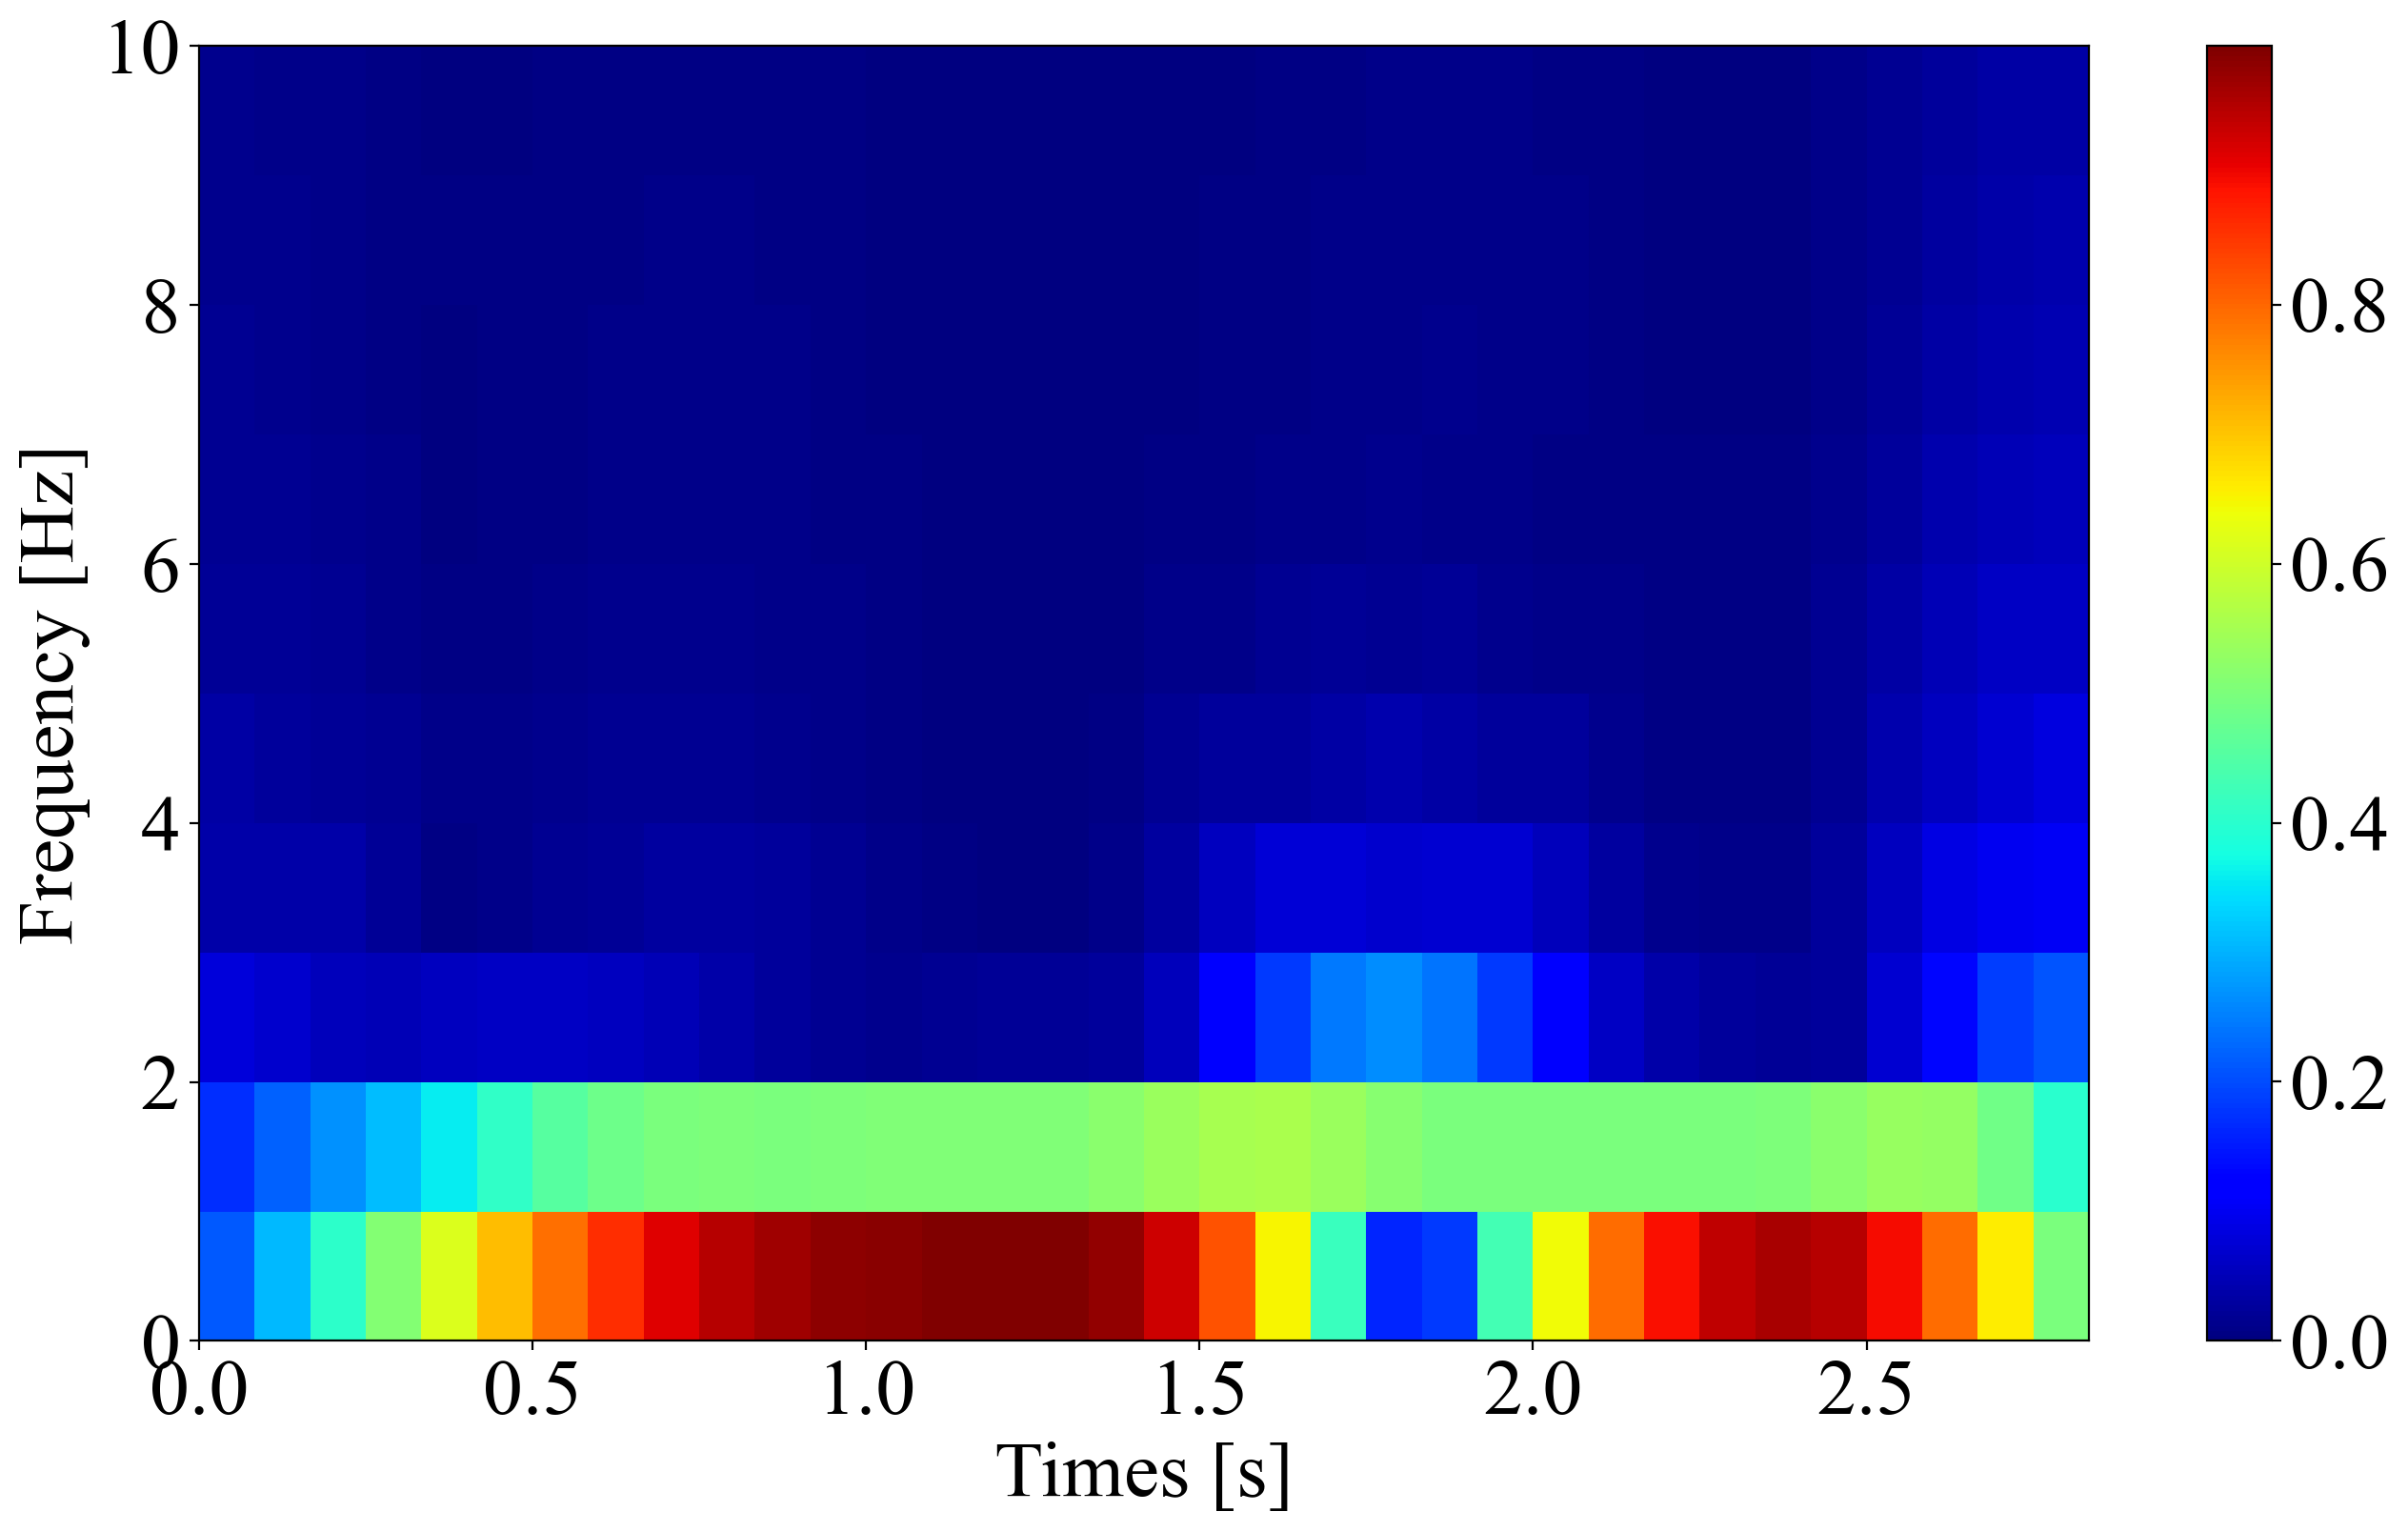

In [18]:
plt.figure(dpi=200, figsize=(16, 9))
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams['font.size'] = 30

plt.pcolormesh(t, freq, F_power, cmap='jet')
plt.ylim(0, 10)
plt.xlabel('Times [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar()